In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

#Model selection Library
from sklearn import model_selection


# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

from pandas.plotting import scatter_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

#Naive Bayes Library 
from sklearn.naive_bayes import GaussianNB

#mlxtend Library for feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
credit_df = pd.read_csv("german_credit.csv")
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [ ]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [7]:
# Print Shape of model data
for feature in credit_df.columns: # Loop through all columns in the dataframe
    if credit_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        credit_df[feature] = pd.get_dummies(credit_df[feature]) # Replace strings with an integer

In [9]:
credit_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,0,6,0,0,1169,0,1,4,0,...,4,0,67,0,0,2,0,1,0,0
1,1,1,48,0,0,5951,0,0,2,1,...,2,0,22,0,0,1,0,1,1,0
2,0,0,12,0,1,2096,0,0,2,0,...,3,0,49,0,0,1,0,2,1,0
3,0,0,42,0,0,7882,0,0,2,0,...,4,1,45,0,1,1,0,2,1,0
4,1,0,24,0,0,4870,0,0,3,0,...,4,0,53,0,1,2,0,2,1,0


In [10]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null uint8
duration_in_month             1000 non-null int64
credit_history                1000 non-null uint8
purpose                       1000 non-null uint8
credit_amount                 1000 non-null int64
savings                       1000 non-null uint8
present_emp_since             1000 non-null uint8
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null uint8
other_debtors                 1000 non-null uint8
present_res_since             1000 non-null int64
property                      1000 non-null uint8
age                           1000 non-null int64
other_installment_plans       1000 non-null uint8
housing                       1000 non-null uint8
credits_this_bank             1000 non-null int64
job                           1000 non-null 

### Check for highly correlated variables but don't required any treatment for this use case

In [12]:
credit_df.corr()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
default,1.000000,0.119581,0.214927,0.134448,0.070088,0.154739,-0.085749,-0.059733,0.072404,0.075493,...,0.002967,0.007238,-0.091127,0.096510,0.081556,-0.045732,0.040559,-0.003015,0.036466,-0.082079
account_check_status,0.119581,1.000000,0.089452,0.019002,-0.004656,0.119612,0.011478,-0.067731,-0.051906,0.012726,...,-0.055817,-0.039577,-0.078121,0.049600,-0.000378,-0.052662,0.051999,-0.066643,-0.015276,-0.059172
duration_in_month,0.214927,0.089452,1.000000,0.033728,0.003750,0.624984,-0.048261,0.017471,0.074749,-0.081432,...,0.034067,-0.056706,-0.036136,0.035851,0.189117,-0.011284,0.147515,-0.023834,-0.164718,-0.138196
credit_history,0.134448,0.019002,0.033728,1.000000,0.011690,0.005923,0.014043,-0.025542,0.030339,0.018129,...,0.027694,-0.036962,0.014360,0.230172,0.070267,-0.095824,0.022804,0.069185,0.016955,-0.019952
purpose,0.070088,-0.004656,0.003750,0.011690,1.000000,-0.007388,-0.008586,0.014248,0.042471,0.054565,...,0.040552,0.015218,0.068483,0.013926,0.141916,-0.010728,-0.005168,0.041204,-0.016831,-0.044969
credit_amount,0.154739,0.119612,0.624984,0.005923,-0.007388,1.000000,-0.055542,-0.009619,-0.271316,-0.093482,...,0.028926,-0.032556,0.032716,0.039474,0.201643,0.020795,0.319715,0.017142,-0.276995,-0.050050
savings,-0.085749,0.011478,-0.048261,0.014043,-0.008586,-0.055542,1.000000,0.019972,0.034708,0.041673,...,-0.002375,-0.012590,0.032007,-0.009087,-0.047989,0.036169,-0.054065,-0.005687,-0.005796,0.030334
present_emp_since,-0.059733,-0.067731,0.017471,-0.025542,0.014248,-0.009619,0.019972,1.000000,0.133371,-0.156321,...,0.302796,-0.036490,0.362520,0.072031,0.168055,0.123622,0.081335,0.081262,-0.083386,-0.053144
installment_as_income_perc,0.072404,-0.051906,0.074749,0.030339,0.042471,-0.271316,0.034708,0.133371,1.000000,-0.086302,...,0.049302,-0.020628,0.058266,-0.016150,0.040098,0.021669,0.042805,-0.071207,-0.014413,-0.090024
personal_status_sex,0.075493,0.012726,-0.081432,0.018129,0.054565,-0.093482,0.041673,-0.156321,-0.086302,1.000000,...,0.013818,0.036266,-0.161694,-0.019313,-0.100872,-0.094260,-0.054070,-0.203431,0.075966,-0.051202


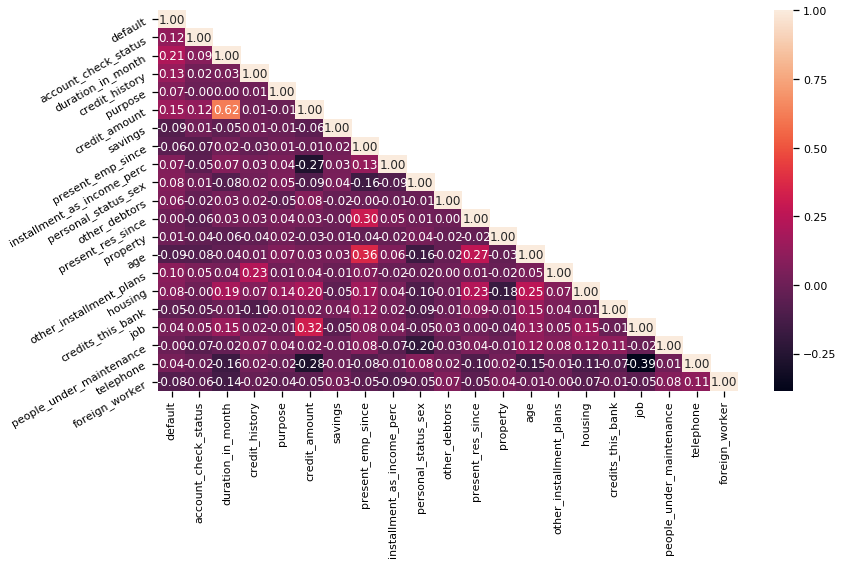

In [14]:
#Graphical representation of correlations between features
corr = credit_df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

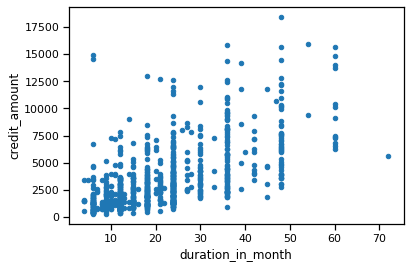

In [17]:
credit_df.plot.scatter(x='duration_in_month', y='credit_amount')

Observation : Credit Amount and Duration in Month feature are moderate correlated

### Drop the original variables which are converted to dummy

In [20]:
for feature in credit_df.columns: # Loop through all columns in the dataframe
    if credit_df[feature].dtype == 'uint8': # Only apply for columns with dummy strings
        credit_df = credit_df.drop([feature], axis =1) # deleting the columns

In [21]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
default                       1000 non-null int64
duration_in_month             1000 non-null int64
credit_amount                 1000 non-null int64
installment_as_income_perc    1000 non-null int64
present_res_since             1000 non-null int64
age                           1000 non-null int64
credits_this_bank             1000 non-null int64
people_under_maintenance      1000 non-null int64
dtypes: int64(8)
memory usage: 62.6 KB


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [22]:
feature_set=credit_df.drop('default',axis=1)
target_set=credit_df['default']
X_train, X_test, y_train, y_test = train_test_split(feature_set, target_set, test_size=0.30,random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500, n_jobs=2,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train,y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [32]:
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

0.72

In [34]:
conf_matrix=metrics.confusion_matrix(y_test, test_pred)
print(conf_matrix)

[[188  26]
 [ 58  28]]


### The result is telling us that we have 188+ 38 = 216 correct predictions and 58 + 26 = 84 incorrect predictions!

Text(0.5, 12.5, 'Predicted label')

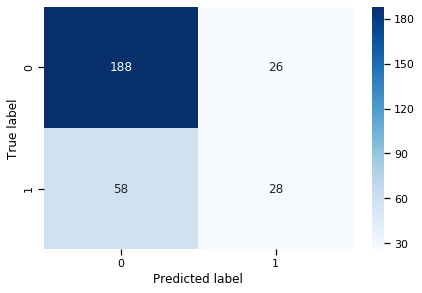

In [35]:
# graphical representation of the confusion matrix for better understanding.

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix,cmap = 'Blues', annot=True, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Q6 Show the list of the features importance( 1 Marks)

[0.19177758 0.33329004 0.06788965 0.08367237 0.25059616 0.04791933
 0.02485487]


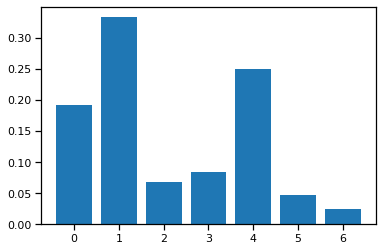

In [39]:
# feature importance
from matplotlib import pyplot
print(rfcl.feature_importances_)
# plot
pyplot.bar(range(len(rfcl.feature_importances_)), rfcl.feature_importances_)
pyplot.show()

Feature 1 : Credit amount, Feature 4 : Age and Feature 0 : Duration in months are of importance for further analysis.

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [41]:
# Use below values
num_folds = 10
seed = 77

In [11]:
#Validate the Random Forest model build above using k fold

NB: 0.710000 (0.052915)
LR: 0.708000 (0.050754)
KNN: 0.662000 (0.055642)
DT: 0.634000 (0.055353)


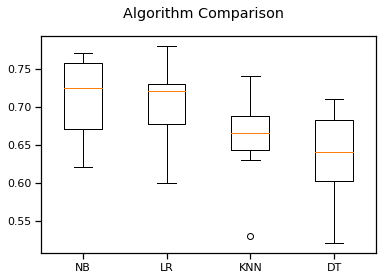

In [59]:
df_result = pd.DataFrame(columns = ['Model', 'Accuracy', 'Scaled Accuracy'])
X=np.array(feature_set)
Y=np.array(target_set)
models = []
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=num_folds,random_state=seed)
    cv_results = model_selection.cross_val_score(model, feature_set, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    df_result = df_result.append({'Model': name, 'Accuracy': cv_results.mean()}, ignore_index=True) 
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
#Calculate Mean score

In [94]:
results = model_selection.cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)
print("Mean Square Error: %.3f" % (results.mean()))

Mean Square Error: -0.389


In [13]:
# Calculate score standard deviation using std()

In [96]:
results = model_selection.cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kfold)
print("Standard deviation: %.3f" % (results.std()))

Standard deviation: 0.055


# Q8 Print the confusion matrix( 1 Marks)

Confusion matrix for Naive Bayes

In [97]:
#Invoking the GaussianNB classifier function.
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print("Training Score: ", gnb_model.score(X_train , y_train))

#Invoking the GaussianNB classifier function.
Y_predictNB = gnb_model.predict(X_test)
print("Testing Score: ", gnb_model.score(X_test , y_test))

Training Score:  0.6985714285714286
Testing Score:  0.73


In [99]:
print(metrics.confusion_matrix(y_test, Y_predictNB))

[[195  19]
 [ 62  24]]


Confusion matrix for logistic regression

In [101]:
#Invoking the Logistic Regression.
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)
print("Training Score: ", LR_model.score(X_train , y_train))

#Invoking the GaussianNB classifier function.
Y_predictLR = LR_model.predict(X_test)
print("Testing Score: ", LR_model.score(X_test , y_test))

Training Score:  0.7142857142857143
Testing Score:  0.7066666666666667


In [103]:
print(metrics.confusion_matrix(y_test, Y_predictLR))

[[199  15]
 [ 73  13]]


Confusion matrix for kNN

In [106]:
#Invoking the k nearest neighbour
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)
print("Training Score: ", KNN_model.score(X_train , y_train))

#Invoking the GaussianNB classifier function.
Y_predictKNN = KNN_model.predict(X_test)
print("Testing Score: ", KNN_model.score(X_test , y_test))

Training Score:  0.7785714285714286
Testing Score:  0.63


In [108]:
print(metrics.confusion_matrix(y_test, Y_predictKNN))

[[170  44]
 [ 67  19]]


Confusion matrix for decision tree classifier

In [109]:
#Invoking the DT
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
print("Training Score: ", DT_model.score(X_train , y_train))

#Invoking the DT classifier function.
Y_predictDT = DT_model.predict(X_test)
print("Testing Score: ", DT_model.score(X_test , y_test))

Training Score:  1.0
Testing Score:  0.6566666666666666


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

Random Forest Classifier

In [111]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       214
           1       0.52      0.33      0.40        86

    accuracy                           0.72       300
   macro avg       0.64      0.60      0.61       300
weighted avg       0.69      0.72      0.70       300



###Naive Bayes Gaussian

In [113]:
print(classification_report(y_test, Y_predictNB))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       214
           1       0.56      0.28      0.37        86

    accuracy                           0.73       300
   macro avg       0.66      0.60      0.60       300
weighted avg       0.70      0.73      0.70       300



###Logistics Regression

In [117]:
print(classification_report(y_test, Y_predictLR))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       214
           1       0.46      0.15      0.23        86

    accuracy                           0.71       300
   macro avg       0.60      0.54      0.52       300
weighted avg       0.65      0.71      0.65       300



###kNN

In [119]:
print(classification_report(y_test, Y_predictKNN))

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       214
           1       0.30      0.22      0.26        86

    accuracy                           0.63       300
   macro avg       0.51      0.51      0.50       300
weighted avg       0.60      0.63      0.61       300



In [121]:
###Decision Tree Classifier

In [122]:
print(classification_report(y_test, Y_predictDT))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       214
           1       0.40      0.38      0.39        86

    accuracy                           0.66       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.65      0.66      0.65       300



[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [131]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [132]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm = RandomForestClassifier(n_estimators = 500, n_jobs=2,criterion="entropy",random_state=1)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [133]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.705
Standard deviation:  0.01176151917625158


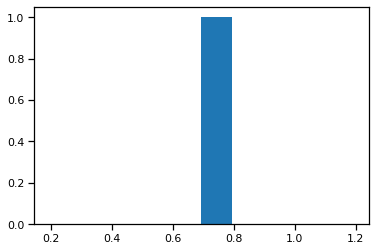

In [134]:
# plot scores
pyplot.hist(acc)
pyplot.show()